# Car price prediction project

# importing neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Loading the Dataset

In [2]:
df = pd.read_csv('cars_price.csv')

In [3]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [4]:
# shape gives the number of rows and columns in the dataset
df.shape

(205, 26)

In [5]:
# returns number od elements in the dataframe
df.size

5330

In [6]:
# list of column names
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Exploratory Data Analysis

In [7]:
# returns the numder of unique values in the column
df.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

In [8]:
# it generates descriptive statistics for all the numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


In [9]:
# to check if there are any duplicate values in the column
df.duplicated().sum()

0

# Checking the unique values in the column

In [10]:
# it gives summary of the dataframe structure and content
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [11]:
# to find all the unique values in the column

for col in df.select_dtypes(include = ['object']).columns:
    print(f'{col}: {df[col].unique()}')
    print("********************************")

normalized-losses: ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
********************************
make: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
********************************
fuel-type: ['gas' 'diesel']
********************************
aspiration: ['std' 'turbo']
********************************
num-of-doors: ['two' 'four' '?']
********************************
body-style: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
********************************
drive-wheels: ['rwd' 'fwd' '4wd']
********************************
engine-location: ['front' 'rear']
*

In [12]:
# to identity the frequency of a particular value..

for col in df.select_dtypes(include = ['object']).columns:
    print(f'{col}:')
    print(f'{df[col].value_counts()}')
    print("********************************")

normalized-losses:
?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64
********************************
make:
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa

In [13]:
# to check for null values in the dataset

df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# Data Preprocessing -- Data Cleaning

In [14]:
# few numerical columns have '?' instead of values..

def handle_Question_mark(value):
        if value == '?':
            return 0
        else:
            return value

In [15]:
# applying the above function to the column which has ? in it

df['normalized-losses'] = df['normalized-losses'].apply(handle_Question_mark)
df['bore'] = df['bore'].apply(handle_Question_mark)
df['stroke'] = df['stroke'].apply(handle_Question_mark)
df['horsepower'] = df['horsepower'].apply(handle_Question_mark)
df['peak-rpm'] = df['peak-rpm'].apply(handle_Question_mark)
df['price'] = df['price'].apply(handle_Question_mark)



# Converting the few object type data columns into integer and float data type

In [16]:
# it is used to retrieve the data type of each column in the dataframe

df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [17]:
# converting the string values to float values
df['normalized-losses'] = df['normalized-losses'].astype(float)
df['bore'] = df['bore'].astype(float)
df['stroke'] = df['stroke'].astype(float)
df['horsepower'] = df['horsepower'].astype(float)
df['peak-rpm'] = df['peak-rpm'].astype(float)
df['price'] = df['price'].astype(float)
 

In [18]:
# the type of the data after conversion
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

# Data Visualisation

# Univariant Analysis (exploring the data with single variable)


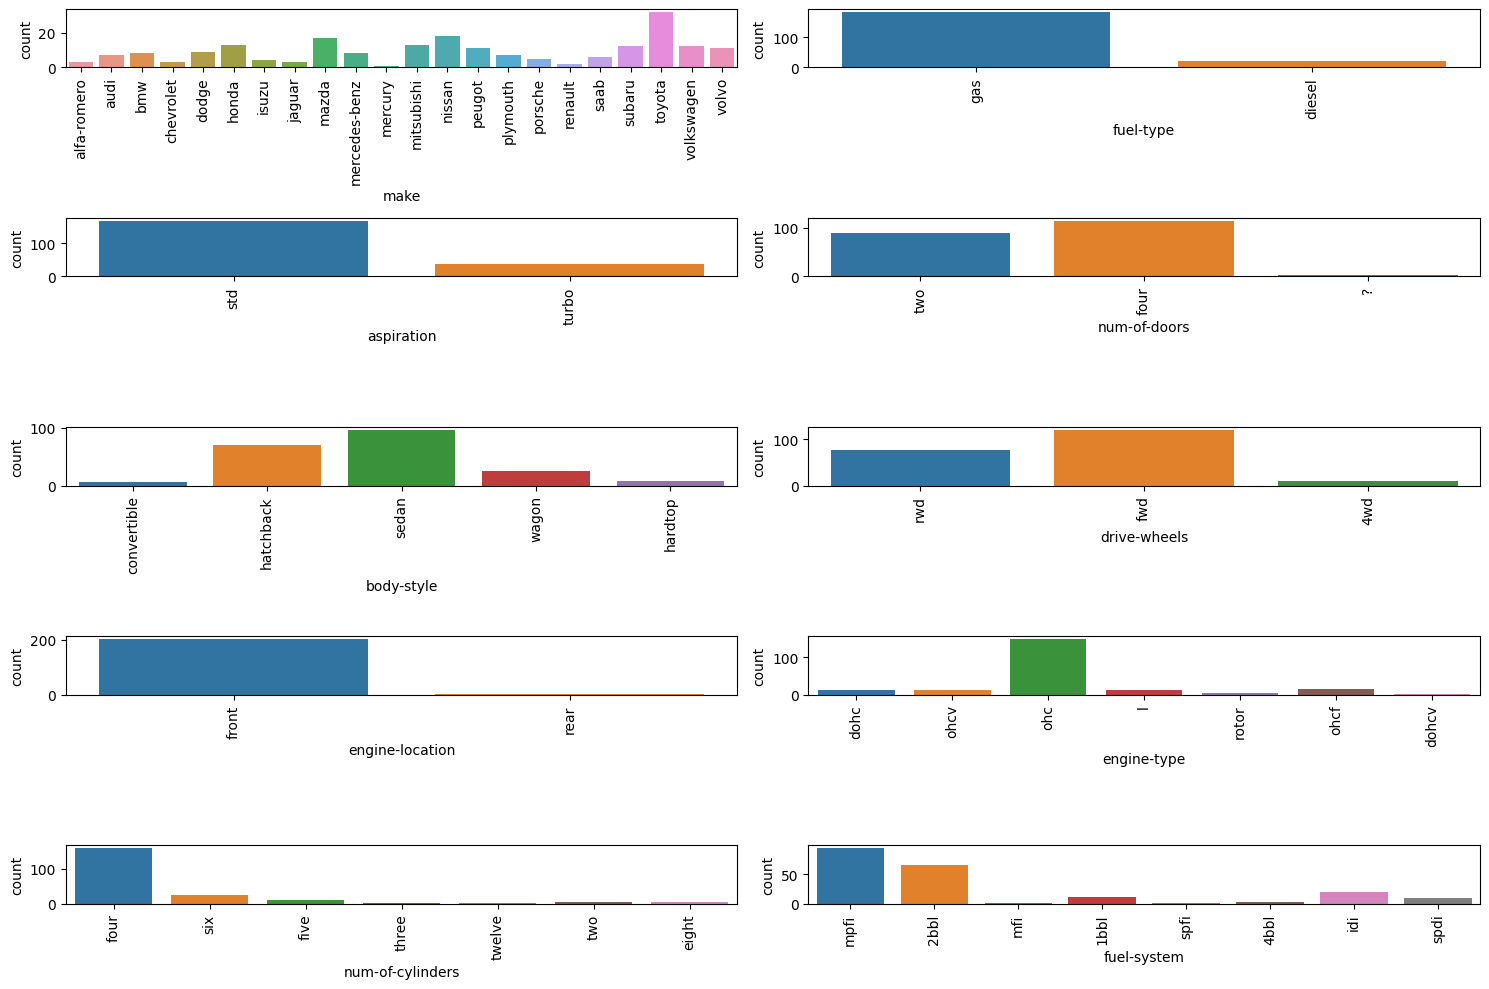

In [19]:
# A count plot is a type of visualization in which the count of occurrences of each unique value in a categorical variable 
# is displayed using bars

categorical_values = []
fig, axs = plt.subplots(nrows = 5,ncols = 2,figsize = (15,10))
axs = axs.flatten()

for cols in df.select_dtypes(include = 'object'):
    categorical_values.append(cols)
    
for i, var in enumerate(categorical_values):
    sns.countplot(x = var,data = df,ax= axs[i])
    axs[i].set_xticklabels(df[var].unique(),rotation = 90)
plt.tight_layout()
    
plt.show()

IndexError: index 10 is out of bounds for axis 0 with size 10

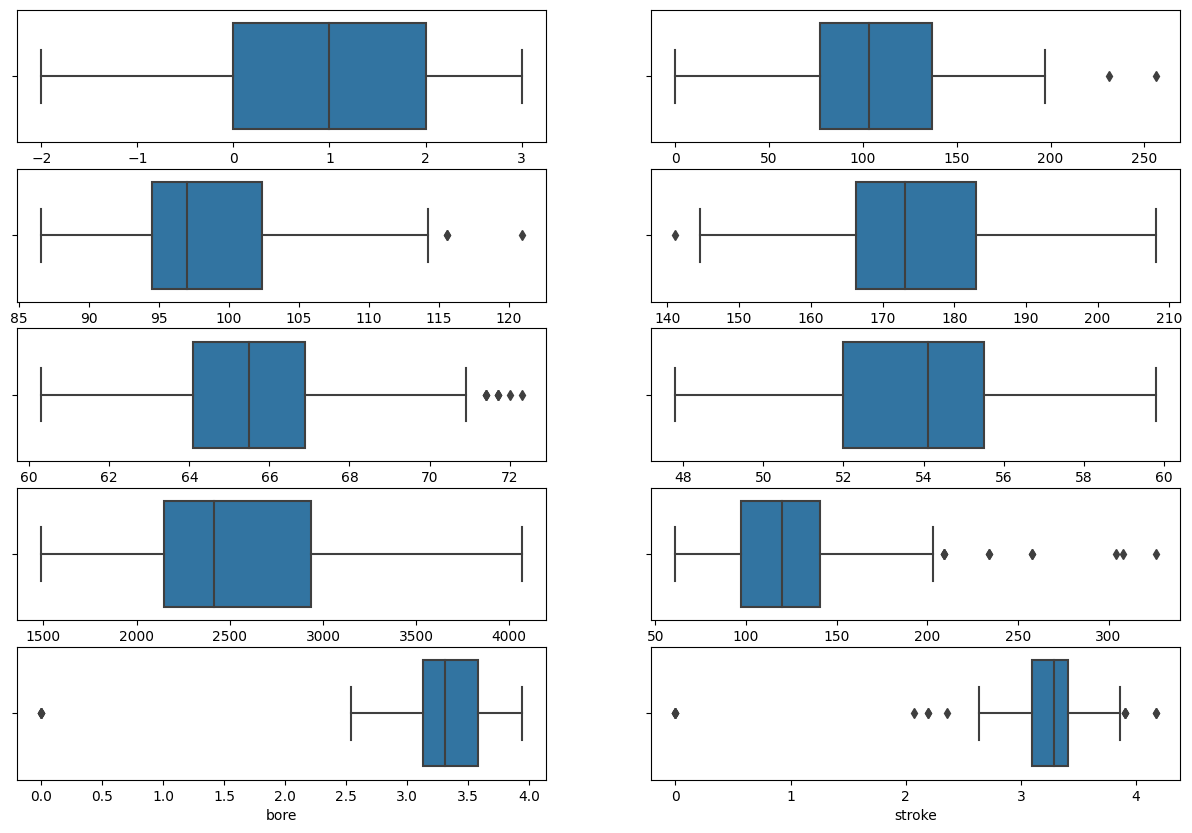

In [20]:
# Box plots provide information about the central tendency, spread, skewness, and presence of outliers in the data. 

numerical_cols = []
fig, axs = plt.subplots(nrows = 5,ncols = 2,figsize = (15,10) )
axs = axs.flatten()
for cols in df.select_dtypes(include = ['int','float']):
    numerical_cols.append(cols)
for i, var in enumerate(numerical_cols):
    sns.boxplot(x = var,data = df,ax =axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [ ]:
# the histplot gives intuition about distribution of the data

numerical_cols = []
fig, axs = plt.subplots(nrows = 8,ncols = 2,figsize = (15,10) )
axs = axs.flatten()
for cols in df.select_dtypes(include = ['int','float']):
    numerical_cols.append(cols)
for i, var in enumerate(numerical_cols):
    sns.histplot(x = var,data = df,ax =axs[i])
    
plt.tight_layout()
plt.show()

In [ ]:
# Box plots provide information about the central tendency, spread, skewness, and presence of outliers in the data. 

plt.figure(figsize = (5,3))
sns.set(style="whitegrid")
sns.boxplot(x = 'price',data = df,orient="h")
plt.xlabel("Price")
plt.show()

# Bivariate Analysis(it determines the statistical relationship between two variables)

In [ ]:
sns.violinplot(data = df,x = "price",y = 'num-of-doors')

In [ ]:
sns.violinplot(data = df,x = "price",y = 'body-style')

In [ ]:
sns.barplot(data = df,x = "price",y = 'drive-wheels')

<AxesSubplot: xlabel='price', ylabel='engine-type'>

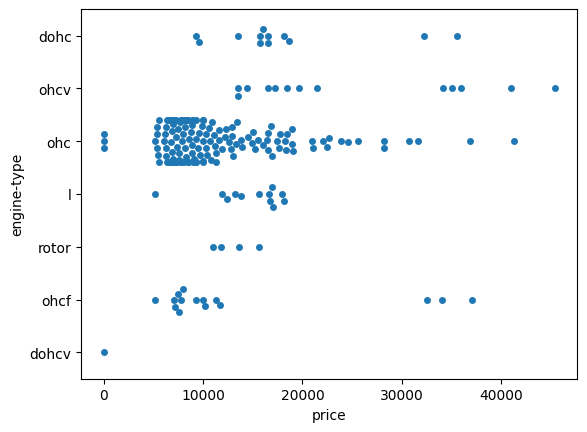

In [21]:
sns.swarmplot(data = df,x = "price",y = 'engine-type')

# Multivariate Analysis(it explores the association between more than two variables)

Text(0.5, 1.0, 'Visualisation of  Price against few features')

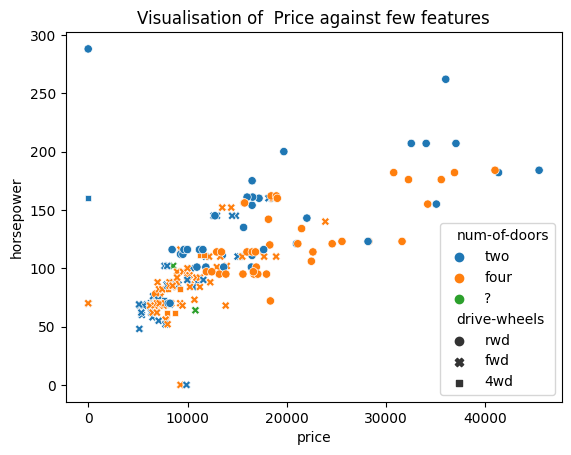

In [22]:
sns.scatterplot(x = 'price',y = 'horsepower',data = df,hue = 'num-of-doors',style = 'drive-wheels',sizes=(25, 300), 
                 legend="full",color=".5")
plt.title("Visualisation of  Price against few features")

# Heat map

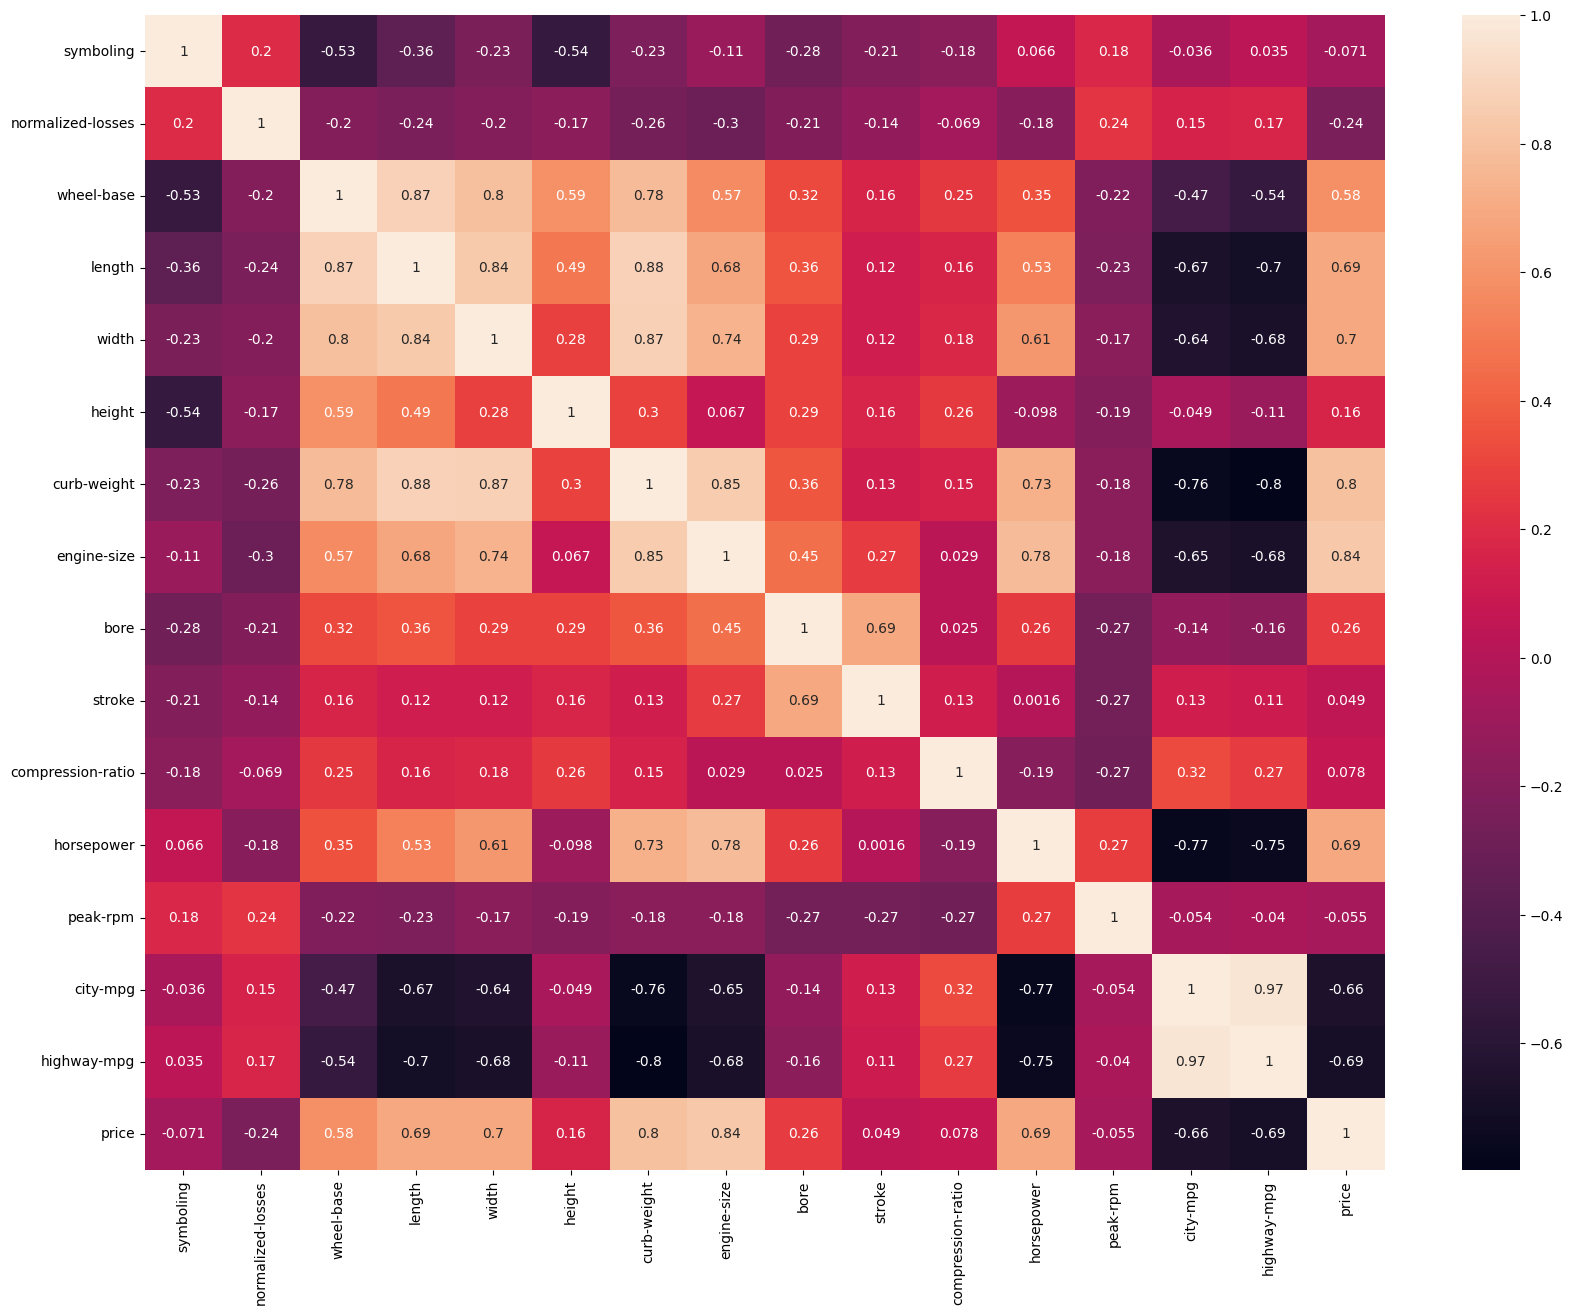

In [23]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),annot = True)
plt.show()

# Filling the null values

In [24]:
# find the mean of the column "normalized-losses" anf filling the null values with the mean
t = df['normalized-losses'].mean()
df['normalized-losses'].fillna(t,inplace = True)
t

97.6

In [25]:
# the other columns have minimal null values so it can dropped
df = df.dropna()

In [26]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# Dropping few unwanted columns that are not related to price prediction 

In [27]:
df = df.drop(["bore","symboling","stroke","compression-ratio","peak-rpm",],axis = 1)

# Handling the Categorical columns

In [28]:
categorical_values = []
for cols in df.select_dtypes(include = 'object'):
    categorical_values.append(cols)
categorical_values
    

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

# Encoding the categorical columns

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:

categorical_values = ['make','fuel-type','num-of-doors','num-of-cylinders','fuel-type']
le = LabelEncoder()
for col in categorical_values:
    le.fit(df[col])
    df[col] = le.transform(df[col])



In [31]:
df

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,city-mpg,highway-mpg,price
0,0.0,0,1,std,2,convertible,rwd,front,88.6,168.8,...,48.8,2548,dohc,2,130,mpfi,111.0,21,27,13495.0
1,0.0,0,1,std,2,convertible,rwd,front,88.6,168.8,...,48.8,2548,dohc,2,130,mpfi,111.0,21,27,16500.0
2,0.0,0,1,std,2,hatchback,rwd,front,94.5,171.2,...,52.4,2823,ohcv,3,152,mpfi,154.0,19,26,16500.0
3,164.0,1,1,std,1,sedan,fwd,front,99.8,176.6,...,54.3,2337,ohc,2,109,mpfi,102.0,24,30,13950.0
4,164.0,1,1,std,1,sedan,4wd,front,99.4,176.6,...,54.3,2824,ohc,1,136,mpfi,115.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,21,1,std,1,sedan,rwd,front,109.1,188.8,...,55.5,2952,ohc,2,141,mpfi,114.0,23,28,16845.0
201,95.0,21,1,turbo,1,sedan,rwd,front,109.1,188.8,...,55.5,3049,ohc,2,141,mpfi,160.0,19,25,19045.0
202,95.0,21,1,std,1,sedan,rwd,front,109.1,188.8,...,55.5,3012,ohcv,3,173,mpfi,134.0,18,23,21485.0
203,95.0,21,0,turbo,1,sedan,rwd,front,109.1,188.8,...,55.5,3217,ohc,3,145,idi,106.0,26,27,22470.0


In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
aspiration = df[['aspiration']]
aspiration = pd.get_dummies(df['aspiration'],drop_first = True,sparse = False)
aspiration.head()

,turbo
0,0
1,0
2,0
3,0
4,0


In [34]:
body_style = df[['body-style']]
body_style = pd.get_dummies(df['body-style'],drop_first = True,sparse = False)
body_style.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [35]:
drive_wheels = df[['drive-wheels']]
drive_wheels = pd.get_dummies(df['drive-wheels'],drop_first = True,sparse = False)
drive_wheels.head()

,fwd,rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0


In [36]:
engine_location = df[['engine-location']]
engine_location = pd.get_dummies(df['engine-location'],drop_first = True,sparse = False)
engine_location.head()

,rear
0,0
1,0
2,0
3,0
4,0


In [37]:
engine_type = df[['engine-type']]
engine_type = pd.get_dummies(df['engine-type'],drop_first = True,sparse = False)
engine_type.head()
type(engine_type)

pandas.core.frame.DataFrame

In [38]:
engine_type = df[['engine-type']]
engine_type = pd.get_dummies(df['engine-type'],drop_first = True,sparse = False)
engine_type.head()

,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [39]:
new_df = pd.concat([df,aspiration,body_style,drive_wheels,engine_location,engine_type],axis = 1)
new_df.drop(['aspiration','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system'],
        axis = 1,inplace = True)
new_df.head()

,normalized-losses,make,fuel-type,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,...,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor
0,0.0,0,1,2,88.6,168.8,64.1,48.8,2548,130,...,0,0,1,0,0,0,0,0,0,0
1,0.0,0,1,2,88.6,168.8,64.1,48.8,2548,130,...,0,0,1,0,0,0,0,0,0,0
2,0.0,0,1,2,94.5,171.2,65.5,52.4,2823,152,...,0,0,1,0,0,0,0,0,1,0
3,164.0,1,1,1,99.8,176.6,66.2,54.3,2337,109,...,0,1,0,0,0,0,1,0,0,0
4,164.0,1,1,1,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,0,0,1,0,0,0


In [40]:
new_df.columns

Index(['normalized-losses', 'make', 'fuel-type', 'num-of-doors', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'engine-size', 'horsepower',
       'city-mpg', 'highway-mpg', 'price', 'turbo', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv', 'rotor'],
      dtype='object')

In [41]:
new_df.dtypes

normalized-losses    float64
make                   int32
fuel-type              int64
num-of-doors           int32
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-size            int64
horsepower           float64
city-mpg               int64
highway-mpg            int64
price                float64
turbo                  uint8
hardtop                uint8
hatchback              uint8
sedan                  uint8
wagon                  uint8
fwd                    uint8
rwd                    uint8
rear                   uint8
dohcv                  uint8
l                      uint8
ohc                    uint8
ohcf                   uint8
ohcv                   uint8
rotor                  uint8
dtype: object

# Splitting the data for Testing and Training

In [42]:
from sklearn.model_selection import train_test_split


In [43]:
# spliting the dataset into independent and dependent varaibles

X = new_df.drop(['price'],axis = 1)
y = new_df['price']

# spliting the dataset into train and test data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)


In [44]:
X

,normalized-losses,make,fuel-type,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,...,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor
0,0.0,0,1,2,88.6,168.8,64.1,48.8,2548,130,...,0,0,1,0,0,0,0,0,0,0
1,0.0,0,1,2,88.6,168.8,64.1,48.8,2548,130,...,0,0,1,0,0,0,0,0,0,0
2,0.0,0,1,2,94.5,171.2,65.5,52.4,2823,152,...,0,0,1,0,0,0,0,0,1,0
3,164.0,1,1,1,99.8,176.6,66.2,54.3,2337,109,...,0,1,0,0,0,0,1,0,0,0
4,164.0,1,1,1,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,21,1,1,109.1,188.8,68.9,55.5,2952,141,...,0,0,1,0,0,0,1,0,0,0
201,95.0,21,1,1,109.1,188.8,68.8,55.5,3049,141,...,0,0,1,0,0,0,1,0,0,0
202,95.0,21,1,1,109.1,188.8,68.9,55.5,3012,173,...,0,0,1,0,0,0,0,0,1,0
203,95.0,21,0,1,109.1,188.8,68.9,55.5,3217,145,...,0,0,1,0,0,0,1,0,0,0


# Scaling the features to a fixed range

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)


# Principal component Analysis(Reducing the dimensionality of the data)

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA()
X_train = pca.fit_transform(X_train_ss)
X_test = pca.transform(X_test_ss)
#print(X_train)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.28711861, 0.14496037, 0.07943307, 0.06407588, 0.0584348 ,
       0.05005441, 0.04026788, 0.03908914, 0.03804499, 0.035564  ,
       0.03004537, 0.02496904, 0.02292149, 0.01623528, 0.01510432,
       0.01266043, 0.0104653 , 0.00706428, 0.00693177, 0.00401299,
       0.00311361, 0.00265426, 0.00237945, 0.00163901, 0.00132129,
       0.00081085, 0.00062811])

In [49]:
"""The above explained tells you how much variance can be attributed to each of the principal components. 
This is important because while you can convert n - dimensional space to a two-dimensional space, 
you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, 
you can see that the first principal component contains 63.46 percent of the variance, 
and the second principal component contains 36.53 percent of the variance. 
Together, the two components contain 100% percent of the information."""

'The above explained tells you how much variance can be attributed to each of the principal components. \nThis is important because while you can convert n - dimensional space to a two-dimensional space, \nyou lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, \nyou can see that the first principal component contains 63.46 percent of the variance, \nand the second principal component contains 36.53 percent of the variance. \nTogether, the two components contain 100% percent of the information.'

In [50]:
Model_Name = []
R2_score   = []
Mean_abs_error = []
Mean_squared_error = []

# Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import time

In [52]:
Model_Name.append("LinearRegression")
lr = LinearRegression()
start = time.time()
lr.fit(X_train,y_train)
end = time.time()
y_predict = lr.predict(X_test)
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predict))
print("R2_score           :",r2_score(y_test,y_predict))
print("Mean Squared Error ",mean_squared_error(y_test,y_predict))
R2_score.append(r2_score(y_test,y_predict))
Mean_abs_error.append(mean_absolute_error(y_test,y_predict))
Mean_squared_error.append(mean_squared_error(y_test,y_predict))


Mean Absolute Error: 2969.7237223112725
R2_score           : 0.7289654290911957
Mean Squared Error  23422454.75608007


# SGD Regressor

In [53]:
from sklearn.linear_model import SGDRegressor

In [54]:
Model_Name.append("SGDRegressor")
sgdr = SGDRegressor()
sgdr.fit(X_train,y_train)
y_predict = sgdr.predict(X_test)
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predict))
print("R2_score           :",r2_score(y_test,y_predict))
print("Mean Squared Error ",mean_squared_error(y_test,y_predict))
R2_score.append(r2_score(y_test,y_predict))
Mean_abs_error.append(mean_absolute_error(y_test,y_predict))
Mean_squared_error.append(mean_squared_error(y_test,y_predict))



Mean Absolute Error: 3021.0615086886996
R2_score           : 0.7311630846470736
Mean Squared Error  23232536.22408469


# KNN Regressor

In [55]:
Model_Name.append("KNN Regressor")
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(X_train,y_train)
y_predict = knr.predict(X_test)
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predict))
print("R2_score           :",r2_score(y_test,y_predict))
print("Mean Squared Error ",mean_squared_error(y_test,y_predict))
R2_score.append(r2_score(y_test,y_predict))
Mean_abs_error.append(mean_absolute_error(y_test,y_predict))
Mean_squared_error.append(mean_squared_error(y_test,y_predict))



Mean Absolute Error: 2752.9414634146337
R2_score           : 0.7731162003240755
Mean Squared Error  19607002.586341463


# Decision Tree Regressor

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
Model_Name.append("DecisionTreeRegressor")
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_predict = dtr.predict(X_test)

print("Mean Absolute Error:",mean_absolute_error(y_test,y_predict))
print("R2_score           :",r2_score(y_test,y_predict))
print("Mean Squared Error ",mean_squared_error(y_test,y_predict))
R2_score.append(r2_score(y_test,y_predict))
Mean_abs_error.append(mean_absolute_error(y_test,y_predict))
Mean_squared_error.append(mean_squared_error(y_test,y_predict))



Mean Absolute Error: 3394.4634146341464
R2_score           : 0.6253148991554511
Mean Squared Error  32379798.609756097


# Random Forest Regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor


In [59]:
Model_Name.append("RandomForestRegressor")
rfg = RandomForestRegressor() 
rfg.fit(X_train,y_train) 
y_predict = rfg.predict(X_test)
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predict)) 
print("R2_score :",r2_score(y_test,y_predict)) 
print("Mean Squared Error ",mean_squared_error(y_test,y_predict)) 
R2_score.append(r2_score(y_test,y_predict)) 
Mean_abs_error.append(mean_absolute_error(y_test,y_predict)) 
Mean_squared_error.append(mean_squared_error(y_test,y_predict))

Mean Absolute Error: 2839.1918699186995
R2_score : 0.7452572445184489
Mean Squared Error  22014537.277288623


# visualisation of R2_score and Mean_absolute error and Mean_squared_error

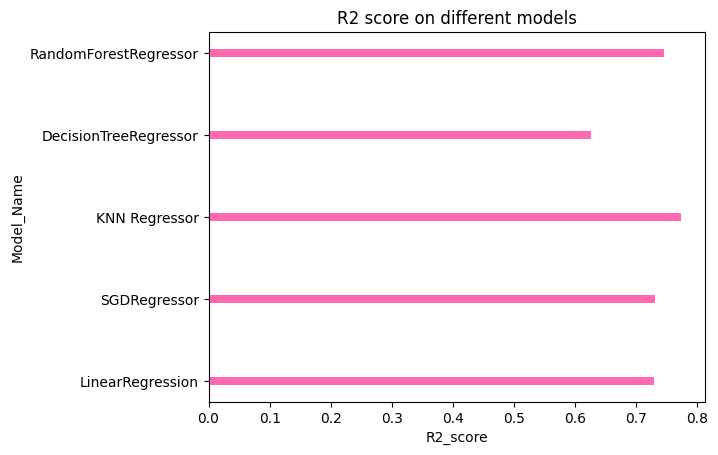

In [60]:
plt.barh(Model_Name, R2_score,
        height = 0.1, color = "hotpink")
 
plt.xlabel("R2_score")
plt.ylabel("Model_Name")
plt.title("R2 score on different models")
plt.show()

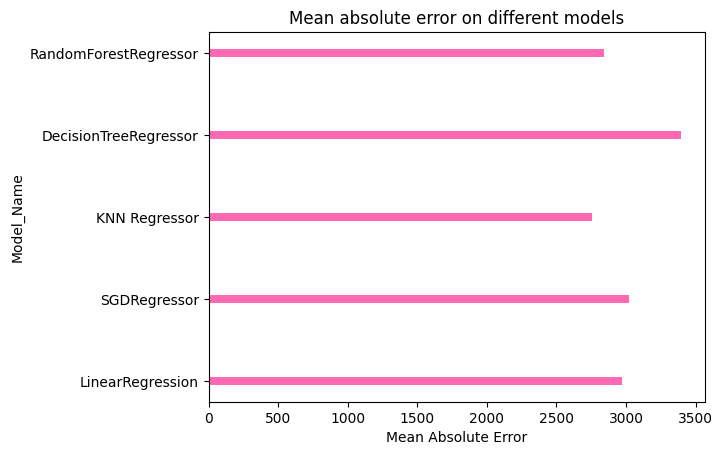

In [61]:
plt.barh(Model_Name,   Mean_abs_error,
        height = 0.1,color = "hotpink")
 
plt.xlabel("Mean Absolute Error")
plt.ylabel("Model_Name")
plt.title("Mean absolute error on different models")
plt.show()

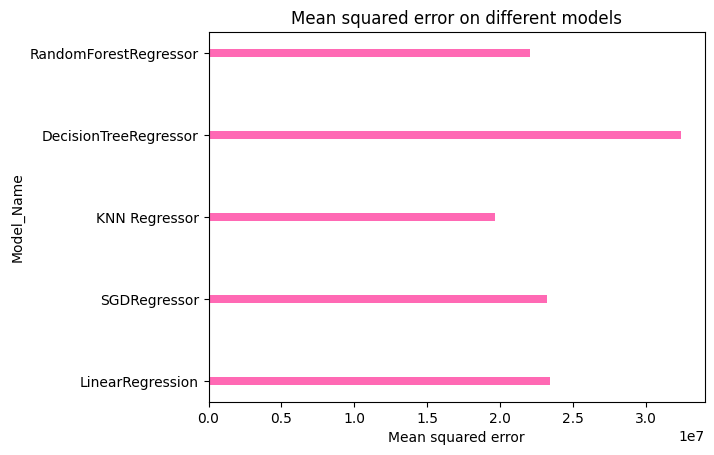

In [62]:
plt.barh(Model_Name, Mean_squared_error,
        height = 0.1, color = "hotpink")
 
plt.xlabel("Mean squared error")
plt.ylabel("Model_Name")
plt.title("Mean squared error on different models")
plt.show()

In [63]:
print(Model_Name)

['LinearRegression', 'SGDRegressor', 'KNN Regressor', 'DecisionTreeRegressor', 'RandomForestRegressor']


In [64]:
print(Mean_abs_error)

[2969.7237223112725, 3021.0615086886996, 2752.9414634146337, 3394.4634146341464, 2839.1918699186995]


# Hyper parameter tuning for top 2 models

In [65]:
Model_Name = []
R2_score_tuned   = []
Mean_abs_error_tuned = []
Mean_squared_error_tuned = []

In [66]:
# Hyper parameter tuning for DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


In [67]:
Model_Name.append("DecisionTreeRegressor")
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }


In [68]:
gs = GridSearchCV(dtr,parameters)
gs.fit(X_train,y_train)
gs.best_params_

{'max_depth': 11,
 'max_features': 'auto',
 'max_leaf_nodes': 40,
 'min_samples_leaf': 3,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'random'}

In [69]:
final_model= gs.best_estimator_
final_model

DecisionTreeRegressor(max_depth=11, max_features='auto', max_leaf_nodes=40,
                      min_samples_leaf=3, min_weight_fraction_leaf=0.1,
                      splitter='random')

In [70]:
# applying the best parameters to the model

dtr = DecisionTreeRegressor(max_depth=11, max_features='auto', max_leaf_nodes=40,
                      min_samples_leaf=3, min_weight_fraction_leaf=0.1,
                      splitter='random')
gs.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']})

In [71]:
gs.score(X_test,y_test)
pred = gs.predict(X_test)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred))
print("R2_score           :",r2_score(y_test,pred))
print("Mean Squared Error ",mean_squared_error(y_test,y_predict)) 
R2_score_tuned.append(r2_score(y_test,y_predict)) 
Mean_abs_error_tuned.append(mean_absolute_error(y_test,y_predict)) 
Mean_squared_error_tuned.append(mean_squared_error(y_test,y_predict))

Mean Absolute Error: 3793.0710399356735
R2_score           : 0.5587530027600072
Mean Squared Error  22014537.277288623


# hyper parameter tuning for RandomForestRegressor

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
Model_Name.append("Random Forest Regressor")
random_grid = {'n_estimators':[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [1,3,5,7,9,11,12],
               'min_samples_split': [2,5,10],
               'min_samples_leaf': [1,2,4],
               'bootstrap':[True,False]}

In [74]:
gs = RandomizedSearchCV(rfg,random_grid)
gs.fit(X_train,y_train)
gs.best_params_

{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 12,
 'bootstrap': True}

In [75]:
final_model= gs.best_estimator_
final_model

RandomForestRegressor(max_depth=12, max_features='auto', min_samples_leaf=4,
                      min_samples_split=5, n_estimators=1800)

In [77]:
# applying the best parameters to the random forest model

rfg = RandomForestRegressor(max_depth=12, max_features='auto', min_samples_leaf=4,
                      min_samples_split=5, n_estimators=1800) 
rfg.fit(X_train,y_train) 
y_predict = rfg.predict(X_test)
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predict)) 
print("R2_score :",r2_score(y_test,y_predict)) 
print("Mean Squared Error ",mean_squared_error(y_test,y_predict)) 
R2_score_tuned.append(r2_score(y_test,y_predict)) 
Mean_abs_error_tuned.append(mean_absolute_error(y_test,y_predict)) 
Mean_squared_error_tuned.append(mean_squared_error(y_test,y_predict))

Mean Absolute Error: 3016.115095670311
R2_score : 0.720911577017185
Mean Squared Error  24118458.166948076


# Final Model : Random forest regressor gives the maximum R2 score of 72%.